## Reading in data and MAJOR CLEANING


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime as dt
import pickle

In [3]:
# Read in csv
df = pd.read_csv("Resources/Animal_Shelter_Louisville.csv")
df.head(10)

,AnimalID,AnimalType,IntakeDate,IntakeType,IntakeSubtype,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,SecondaryColor,...,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,OutcomeSubtype,OutcomeReason,OutcomeInternalStatus,OutcomeAsilomarStatus,ReproductiveStatusAtOutcome
0,A366370,CAT,7/11/2008 10:50,STRAY,OTC,WHITE,DOMESTIC SHORTHAIR,NaN,NEUTERED MALE,BROWN,...,FEARFUL,HEALTHY,ALTERED,12/11/2008 15:46,EUTH,FERAL,NaN,NaN,UNHEALTHY/UNTREATABLE,ALTERED
1,A366531,CAT,10/11/2008 10:20,STRAY,OTC,BLACK,DOMESTIC SHORTHAIR,DOMESTIC SHORTHAIR,UNKNOWN,NaN,...,NORMAL,HEALTHY,UNKNOWN,19/11/2008 20:10,EUTH,CONTAG DIS,NaN,SICK,HEALTHY,UNKNOWN
2,A532367,BIRD,23/7/2014 23:21,CONFISCATE,CRUELTY,RED,CHICKEN,NaN,MALE,BLACK,...,OTHER,HEALTHY,FERTILE,5/11/2014 15:49,TRANSFER,NaN,NaN,NaN,HEALTHY,FERTILE
3,A532474,OTHER,24/7/2014 18:29,ET REQUEST,NaN,BROWN,BAT,NaN,UNKNOWN,NaN,...,OTHER,HEALTHY,UNKNOWN,24/7/2014 23:59,EUTH,MEDICAL,NaN,OTHER,HEALTHY,UNKNOWN
4,A281756,DOG,11/9/2006 18:10,OWNER SUR,OTC,WHITE,PIT BULL TERRIER,NaN,MALE,BROWN,...,NORMAL,HEALTHY,FERTILE,12/9/2006 13:44,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,FERTILE
5,A451184,BIRD,29/1/2012 15:25,OWNER SUR,FIELD,BLACK,CHICKEN,NaN,UNKNOWN,WHITE,...,NORMAL,HEALTHY,UNKNOWN,22/2/2012 23:59,TRANSFER,RESCUE GRP,NaN,NORMAL,HEALTHY,UNKNOWN
6,A256128,DOG,26/11/2005 12:35,STRAY,FIELD,BROWN,AMERICAN PIT BULL TERRIER,MIX,MALE,WHITE,...,NORMAL,HEALTHY,FERTILE,8/12/2005 23:59,EUTH,MEDICAL,NaN,NaN,HEALTHY,FERTILE
7,A314432,CAT,15/6/2007 17:13,OWNER SUR,OTC,BROWN TABBY,DOMESTIC SHORTHAIR,NaN,UNKNOWN,NaN,...,NORMAL,HEALTHY,UNKNOWN,15/6/2007 18:07,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,UNKNOWN
8,A316619,DOG,29/6/2007 20:10,STRAY,FIELD,WHITE,LABRADOR RETRIEVER,MIX,MALE,TAN,...,FEARFUL,HEALTHY,FERTILE,4/7/2007 13:12,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,FERTILE
9,A317335,CAT,5/7/2007 21:30,STRAY,OTC,GRAY,DOMESTIC SHORTHAIR,NaN,UNKNOWN,NaN,...,NORMAL,HEALTHY,UNKNOWN,11/7/2007 9:19,EUTH,TIME/SPACE,NaN,NaN,HEALTHY,UNKNOWN


In [4]:
# Check for nulls
df.isna().sum()

AnimalID                            0
AnimalType                          0
IntakeDate                          0
IntakeType                          0
IntakeSubtype                    4556
PrimaryColor                       17
PrimaryBreed                        0
SecondaryBreed                 110310
Gender                              0
SecondaryColor                  70263
DOB                             56224
IntakeReason                   116037
IntakeInternalStatus                0
IntakeAsilomarStatus                0
ReproductiveStatusAtIntake          0
OutcomeDate                       202
OutcomeType                       452
OutcomeSubtype                  26982
OutcomeReason                  150842
OutcomeInternalStatus          101121
OutcomeAsilomarStatus             202
ReproductiveStatusAtOutcome       202
dtype: int64

In [5]:
df.columns

Index(['AnimalID', 'AnimalType', 'IntakeDate', 'IntakeType', 'IntakeSubtype',
       'PrimaryColor', 'PrimaryBreed', 'SecondaryBreed', 'Gender',
       'SecondaryColor', 'DOB', 'IntakeReason', 'IntakeInternalStatus',
       'IntakeAsilomarStatus', 'ReproductiveStatusAtIntake', 'OutcomeDate',
       'OutcomeType', 'OutcomeSubtype', 'OutcomeReason',
       'OutcomeInternalStatus', 'OutcomeAsilomarStatus',
       'ReproductiveStatusAtOutcome'],
      dtype='object')

In [6]:
# Drop unnecessary columns
df2 = df.drop(columns=['AnimalID',
                       'IntakeType', 
                       'IntakeSubtype', 
                       'OutcomeSubtype',
                      'SecondaryColor',
                       'IntakeReason',
                      'ReproductiveStatusAtOutcome',
                       'OutcomeReason',
                      'OutcomeInternalStatus',
                      'OutcomeAsilomarStatus'])

In [7]:
df2.head()


,AnimalType,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
0,CAT,7/11/2008 10:50,WHITE,DOMESTIC SHORTHAIR,NaN,NEUTERED MALE,NaN,FEARFUL,HEALTHY,ALTERED,12/11/2008 15:46,EUTH
1,CAT,10/11/2008 10:20,BLACK,DOMESTIC SHORTHAIR,DOMESTIC SHORTHAIR,UNKNOWN,NaN,NORMAL,HEALTHY,UNKNOWN,19/11/2008 20:10,EUTH
2,BIRD,23/7/2014 23:21,RED,CHICKEN,NaN,MALE,NaN,OTHER,HEALTHY,FERTILE,5/11/2014 15:49,TRANSFER
3,OTHER,24/7/2014 18:29,BROWN,BAT,NaN,UNKNOWN,NaN,OTHER,HEALTHY,UNKNOWN,24/7/2014 23:59,EUTH
4,DOG,11/9/2006 18:10,WHITE,PIT BULL TERRIER,NaN,MALE,11/9/2005 0:00,NORMAL,HEALTHY,FERTILE,12/9/2006 13:44,EUTH


In [8]:
# Change object to datetime so we can calculate AgeInMonth and DurationInShelter
df2["IntakeDate"] = pd.to_datetime(df2["IntakeDate"])
df2["DOB"] = pd.to_datetime(df2["DOB"])
df2["OutcomeDate"] = pd.to_datetime(df2["OutcomeDate"])

In [9]:
df2.dtypes

AnimalType                            object
IntakeDate                    datetime64[ns]
PrimaryColor                          object
PrimaryBreed                          object
SecondaryBreed                        object
Gender                                object
DOB                           datetime64[ns]
IntakeInternalStatus                  object
IntakeAsilomarStatus                  object
ReproductiveStatusAtIntake            object
OutcomeDate                   datetime64[ns]
OutcomeType                           object
dtype: object

In [10]:
df2.groupby("AnimalType").count()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
AnimalType,,,,,,,,,,,
BIRD,1185,1185,1185,69,1185,310,1185,1185,1185,1185,1176
CAT,68741,68738,68741,2658,68741,39386,68741,68741,68741,68680,68563
DOG,77145,77131,77145,37715,77145,53709,77145,77145,77145,77008,76905
FERRET,91,91,91,0,91,51,91,91,91,91,91
LIVESTOCK,256,256,256,28,256,109,256,256,256,254,253
OTHER,1341,1341,1341,2,1341,292,1341,1341,1341,1340,1322
RABBIT,1139,1139,1139,30,1139,436,1139,1139,1139,1138,1138
REPTILE,263,263,263,26,263,86,263,263,263,263,262
RODENT,681,681,681,4,681,239,681,681,681,681,680


In [11]:
# Drop all rows NOT dog!
df3 = df2.drop(df2[(df2['AnimalType'] == "BIRD") | 
                   (df2['AnimalType'] == "CAT") |
                   (df2['AnimalType'] == "FERRET") |
                   (df2['AnimalType'] == "LIVESTOCK") |
                   (df2['AnimalType'] == "OTHER") |
                   (df2['AnimalType'] == "RABBIT") |
                   (df2['AnimalType'] == "REPTILE") |
                   (df2['AnimalType'] == "RODENT")].index)

In [12]:
df3.groupby("AnimalType").count()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
AnimalType,,,,,,,,,,,
DOG,77145,77131,77145,37715,77145,53709,77145,77145,77145,77008,76905


## Option to Review charts

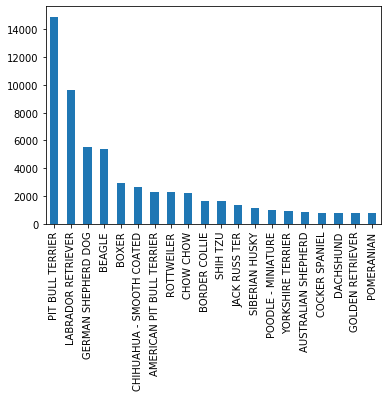

In [13]:
# Take a quick peak at charts

# Top Breeds
df3['PrimaryBreed'].value_counts().head(20).plot.bar()

# Top Outcome_Types
# df3['OutcomeType'].value_counts().head(20).plot.bar()

# Dog Status?
# df3['IntakeInternalStatus'].value_counts().head(20).plot.bar()

# Fixed?
# df['Fixed'].value_counts().head(20).plot.bar()

# Age chart
# bins= [0,24,72,120]
# plt.hist(df.Age_month, bins=bins, edgecolor="k")
# plt.xticks(bins)
# plt.show()

## Cleaning WITHIN dog data
1. Drop more unnessary columns (eg. IntakeAsilomarStatus)
2. Drop rows where "Outcome_Type" is null
3. Drop rows where "Outcome_Type" is Return_To_Owner
4. Calculate dog age in months (IntakeDate - DOB)

In [12]:
# Found dog data, drop AnimalType column
df3 = df3.drop(columns=['AnimalType'])

In [13]:
# Quick check for missing values
# Solution - Going to drop NA in OutcomeType first, then work on others.  We will NOT drop Secondary breed until we
#            create Kelly's 3 BreedCategory column.
df3.isna().sum()

IntakeDate                        0
PrimaryColor                     14
PrimaryBreed                      0
SecondaryBreed                39430
Gender                            0
DOB                           23436
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeDate                     137
OutcomeType                     240
dtype: int64

In [14]:
df3.columns

Index(['IntakeDate', 'PrimaryColor', 'PrimaryBreed', 'SecondaryBreed',
       'Gender', 'DOB', 'IntakeInternalStatus', 'IntakeAsilomarStatus',
       'ReproductiveStatusAtIntake', 'OutcomeDate', 'OutcomeType'],
      dtype='object')

In [15]:
# Drop rows where OutcomeType is null

df3 = df3.loc[df3.OutcomeType.notna(), ["IntakeDate", 
                                        'PrimaryColor',
                                        "PrimaryBreed", 
                                        "SecondaryBreed", 
                                        "Gender",
                                        'DOB',
                                        "IntakeInternalStatus", 
                                        'IntakeAsilomarStatus', 
                                        'ReproductiveStatusAtIntake', 
                                        'OutcomeDate',
                                        'OutcomeType']]


In [16]:
df3.shape

(76905, 11)

In [17]:
# Check for more nulls

# df3.apply(lambda x: sum(x.isnull()/len(df3)))
df3.isna().sum()

IntakeDate                        0
PrimaryColor                     14
PrimaryBreed                      0
SecondaryBreed                39296
Gender                            0
DOB                           23414
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeDate                       6
OutcomeType                       0
dtype: int64

In [18]:
# Group Outcome Type

df3.groupby('OutcomeType').count()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate
OutcomeType,,,,,,,,,,
ADOPTION,15368,15366,15368,9060,15368,13675,15368,15368,15368,15368
DIED,716,716,716,346,716,327,716,716,716,716
DISPOSAL,1127,1127,1127,360,1127,968,1127,1127,1127,1127
ET PROCESS,30,30,30,17,30,8,30,30,30,30
EUTH,30088,30079,30088,14527,30088,14610,30088,30088,30088,30087
FOSTER,1032,1032,1032,491,1032,998,1032,1032,1032,1030
INDEFINITE,1,1,1,1,1,0,1,1,1,1
MISSING,501,501,501,301,501,225,501,501,501,501
MISSING EX,2,2,2,1,2,2,2,2,2,2


In [19]:
# Drop all rows 'RTO'. Assuming that chip is checked at intake

df3 = df3.drop(df3[df3.OutcomeType == "RTO"].index)

In [20]:
df3.shape

(63710, 11)

In [21]:
# More nulls?  Keeping secondary breed for now
# df3.apply(lambda x: sum(x.isnull()/len(df3)))
df3.isna().sum()

IntakeDate                        0
PrimaryColor                     12
PrimaryBreed                      0
SecondaryBreed                31546
Gender                            0
DOB                           20875
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeDate                       3
OutcomeType                       0
dtype: int64

In [22]:
df3.loc[df3['DOB'].isna()]

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
6,2005-11-26 12:35:00,BROWN,AMERICAN PIT BULL TERRIER,MIX,MALE,NaT,NORMAL,HEALTHY,FERTILE,2005-08-12 23:59:00,EUTH
8,2007-06-29 20:10:00,WHITE,LABRADOR RETRIEVER,MIX,MALE,NaT,FEARFUL,HEALTHY,FERTILE,2007-04-07 13:12:00,EUTH
15,2007-07-19 22:32:00,TRICOLOR,BEAGLE,MIX,NEUTERED MALE,NaT,NORMAL,HEALTHY,ALTERED,2007-07-08 12:13:00,EUTH
17,2005-12-21 14:30:00,WHITE,PIT BULL TERRIER,NaN,MALE,NaT,NORMAL,HEALTHY,FERTILE,2005-12-29 11:05:00,EUTH
18,2005-12-22 12:23:00,BROWN BRINDLE,AMERICAN PIT BULL TERRIER,AMERICAN PIT BULL TERRIER,MALE,NaT,NORMAL,HEALTHY,FERTILE,2005-12-28 10:35:00,EUTH
...,...,...,...,...,...,...,...,...,...,...,...
150756,2009-05-12 12:58:00,TRICOLOR,POMERANIAN,NaN,SPAYED FEMALE,NaT,NORMAL,HEALTHY,FERTILE,2009-12-18 10:05:00,ADOPTION
150759,2011-03-17 23:22:00,WHITE,JACK RUSS TER,MIX,NEUTERED MALE,NaT,NORMAL,HEALTHY,FERTILE,2011-07-05 23:59:00,TRANSFER
150760,2010-03-28 14:50:00,BROWN,POMERANIAN,PAPILLON,SPAYED FEMALE,NaT,NORMAL,HEALTHY,FERTILE,2010-12-04 17:09:00,ADOPTION
150797,2009-11-24 09:37:00,TRICOLOR,BEAGLE,NaN,SPAYED FEMALE,NaT,EMACIATED,HEALTHY,FERTILE,2010-12-02 18:57:00,ADOPTION


In [23]:
# Drop NA values in DOB (can't have nulls to calculate AgeInMonths)
df3 = df3.dropna(axis=0, subset=["DOB", 'PrimaryColor', 'OutcomeDate'])
df3.shape

(42822, 11)

In [24]:
df3.isna().sum()

IntakeDate                        0
PrimaryColor                      0
PrimaryBreed                      0
SecondaryBreed                20998
Gender                            0
DOB                               0
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeDate                       0
OutcomeType                       0
dtype: int64

In [25]:
(df3.loc[df3["DOB"].isnull()])
        

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType
870,2013-09-10 01:07:00,BROWN,PIT BULL TERRIER,NaN,MALE,2013-09-10,NURSING,HEALTHY,FERTILE,2013-11-26 10:06:00,TRANSFER
3761,2013-10-14 13:07:00,BROWN,PIT BULL TERRIER,MIX,UNKNOWN,2013-10-14,NURSING,HEALTHY,UNKNOWN,2013-10-18 14:47:00,TRANSFER
4004,2013-11-10 01:07:00,BLUE MERLE,PIT BULL TERRIER,NaN,MALE,2013-11-10,NORMAL,HEALTHY,FERTILE,2013-10-18 09:52:00,DIED
4229,2008-05-22 13:24:00,BROWN,DOBERMAN PINSCHER,MIX,SPAYED FEMALE,2008-06-03,NORMAL,HEALTHY,ALTERED,2008-05-29 17:33:00,ADOPTION
5107,2013-10-14 13:07:00,BLACK,PIT BULL TERRIER,MIX,UNKNOWN,2013-10-14,NURSING,HEALTHY,UNKNOWN,2013-10-18 14:48:00,TRANSFER
150718,2013-03-25 16:37:00,BROWN,BORDER TERRIER,MIX,SPAYED FEMALE,2013-05-01,NORMAL,HEALTHY,FERTILE,2013-05-04 15:31:00,ADOPTION
150723,2017-02-11 12:29:00,BROWN,PIT BULL TERRIER,MIX,SPAYED FEMALE,2017-08-21,NORMAL,HEALTHY,FERTILE,2017-03-11 18:37:00,ADOPTION
150725,2012-01-12 13:22:00,TAN,LABRADOR RETRIEVER,GERMAN SHEPHERD DOG,SPAYED FEMALE,2012-02-01,NORMAL,HEALTHY,FERTILE,2013-12-01 11:40:00,TRANSFER
150809,2010-09-12 21:15:00,BLACK,SHIH TZU,LHASA APSO,NEUTERED MALE,2010-09-27,NORMAL,HEALTHY,FERTILE,2010-12-19 16:53:00,ADOPTION
150815,2012-05-11 12:20:00,BLACK,BEAGLE,MIX,SPAYED FEMALE,2012-08-14,NORMAL,HEALTHY,FERTILE,2012-11-13 12:51:00,ADOPTION


In [26]:
# Create AgeInMonth column 
df3['AgeInMonths'] = round(((df3['IntakeDate'] - df3['DOB']).dt.days)/30, 2)
df3.head()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,AgeInMonths
4,2006-11-09 18:10:00,WHITE,PIT BULL TERRIER,NaN,MALE,2005-11-09,NORMAL,HEALTHY,FERTILE,2006-12-09 13:44:00,EUTH,12.17
51,2008-05-21 10:24:00,BLACK,BORDER COLLIE,MIX,SPAYED FEMALE,2007-07-21,NORMAL,HEALTHY,ALTERED,2008-09-06 14:15:00,ADOPTION,10.17
69,2005-02-18 11:37:00,TAN,GOLDEN RETRIEVER,MIX,NEUTERED MALE,2003-03-18,NORMAL,HEALTHY,ALTERED,2005-04-15 15:03:00,ADOPTION,23.43
99,2007-06-11 19:54:00,WHITE,LABRADOR RETRIEVER,NaN,SPAYED FEMALE,2007-06-06,NORMAL,HEALTHY,ALTERED,2007-12-12 10:31:00,ADOPTION,0.17
103,2009-09-02 17:11:00,BLACK,PIT BULL TERRIER,NaN,MALE,2008-09-10,SICK,HEALTHY,FERTILE,2009-09-02 23:59:00,EUTH,11.90


In [27]:
# Create DurationInShelter column
df3['DurationInShelter'] = round(((df3['OutcomeDate'] - df3['IntakeDate']).dt.days), 2)
df3.head()

,IntakeDate,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,DOB,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeDate,OutcomeType,AgeInMonths,DurationInShelter
4,2006-11-09 18:10:00,WHITE,PIT BULL TERRIER,NaN,MALE,2005-11-09,NORMAL,HEALTHY,FERTILE,2006-12-09 13:44:00,EUTH,12.17,29
51,2008-05-21 10:24:00,BLACK,BORDER COLLIE,MIX,SPAYED FEMALE,2007-07-21,NORMAL,HEALTHY,ALTERED,2008-09-06 14:15:00,ADOPTION,10.17,108
69,2005-02-18 11:37:00,TAN,GOLDEN RETRIEVER,MIX,NEUTERED MALE,2003-03-18,NORMAL,HEALTHY,ALTERED,2005-04-15 15:03:00,ADOPTION,23.43,56
99,2007-06-11 19:54:00,WHITE,LABRADOR RETRIEVER,NaN,SPAYED FEMALE,2007-06-06,NORMAL,HEALTHY,ALTERED,2007-12-12 10:31:00,ADOPTION,0.17,183
103,2009-09-02 17:11:00,BLACK,PIT BULL TERRIER,NaN,MALE,2008-09-10,SICK,HEALTHY,FERTILE,2009-09-02 23:59:00,EUTH,11.90,0


In [28]:
# Dropping columns we don't need anymore since we have AgeInMonths and DurationInShelter
df4 = df3.drop(columns=['IntakeDate',
                       'DOB', 
                       'OutcomeDate'])

In [29]:
# More nulls?  Keeping secondary breed for now
df4.isna().sum()

PrimaryColor                      0
PrimaryBreed                      0
SecondaryBreed                20998
Gender                            0
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeType                       0
AgeInMonths                       0
DurationInShelter                 0
dtype: int64

In [30]:
df4.shape

(42822, 10)

## Add new features / Update features? Feature Engineering
1. Created new feature BreedCategory column - Mixed/Two/Pure Breed  
2. Created new feature InternalStatus column - Grouping "IntakeInternalStatus" eg. grouping all aggressive into 1 main agg group
3. Created new PetAgeCategory column - Group dogs into bins based on age: Baby/Young/Adult/Senior
4. Created new Sex column - Male/Female (With no internal status)
5. Created TopBreeds column - Had 189 unique values.  Grouping similar breeds and taking top 25.  Outside top 25, grouped into "Other"
6. Grouping similar colors - went from 41 unique colors to 12
7. Created BinaryOutcome column - Take or Don't take the dog

#### Feature Engineering 1 - Creating a BreedCategory column
* Mix = Breed has the word "Mix"
* Two = If there are 2 breeds listed
* Pure = Only 1 breed in the primary (i.e. None in secondary OR Pure)

In [31]:
df4.loc[500:1000, :]

,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter
517,BROWN,PIT BULL TERRIER,NaN,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,0.57,20
520,BLACK,BEAGLE,NaN,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,MISSING,6.37,85
541,BROWN,GERMAN SHEPHERD DOG,MIX,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,2.03,5
600,BROWN BRINDLE,PIT BULL TERRIER,MIX,MALE,NORMAL,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,24.33,0
656,BLACK,LABRADOR RETRIEVER,CHOW CHOW,MALE,NORMAL,HEALTHY,FERTILE,EUTH,24.33,7
683,WHITE,JACK RUSS TER,RAT TERRIER,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,12.17,-55
755,BLACK,PUG,MIX,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,1
813,BROWN,PIT BULL TERRIER,NaN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,RELEASED,10.13,0
849,WHITE,AMERICAN PIT BULL TERRIER,NaN,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,12.10,-172
870,BROWN,PIT BULL TERRIER,NaN,MALE,NURSING,HEALTHY,FERTILE,TRANSFER,0.00,77


In [32]:
df4.isna().sum()

PrimaryColor                      0
PrimaryBreed                      0
SecondaryBreed                20998
Gender                            0
IntakeInternalStatus              0
IntakeAsilomarStatus              0
ReproductiveStatusAtIntake        0
OutcomeType                       0
AgeInMonths                       0
DurationInShelter                 0
dtype: int64

In [33]:
# df3.SecondaryBreed.value_counts().sort_values(ascending=False).head(20)
# df3.SecondaryBreed.count()

In [34]:
# Add new column called BreedCategory, set all to Mix

df4["BreedCategory"]= "TWO"
df4.loc[500:1000, :]

,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
517,BROWN,PIT BULL TERRIER,NaN,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,0.57,20,TWO
520,BLACK,BEAGLE,NaN,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,MISSING,6.37,85,TWO
541,BROWN,GERMAN SHEPHERD DOG,MIX,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,2.03,5,TWO
600,BROWN BRINDLE,PIT BULL TERRIER,MIX,MALE,NORMAL,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,24.33,0,TWO
656,BLACK,LABRADOR RETRIEVER,CHOW CHOW,MALE,NORMAL,HEALTHY,FERTILE,EUTH,24.33,7,TWO
683,WHITE,JACK RUSS TER,RAT TERRIER,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,12.17,-55,TWO
755,BLACK,PUG,MIX,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,1,TWO
813,BROWN,PIT BULL TERRIER,NaN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,RELEASED,10.13,0,TWO
849,WHITE,AMERICAN PIT BULL TERRIER,NaN,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,12.10,-172,TWO
870,BROWN,PIT BULL TERRIER,NaN,MALE,NURSING,HEALTHY,FERTILE,TRANSFER,0.00,77,TWO


In [35]:
# Find rows containing word "Nan" in SecondaryBreed and set to Pure

df4.loc[df4['SecondaryBreed'].isnull(),'BreedCategory'] = "PURE"
df4.loc[500:1000, :]

,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
517,BROWN,PIT BULL TERRIER,NaN,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,0.57,20,PURE
520,BLACK,BEAGLE,NaN,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,MISSING,6.37,85,PURE
541,BROWN,GERMAN SHEPHERD DOG,MIX,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,2.03,5,TWO
600,BROWN BRINDLE,PIT BULL TERRIER,MIX,MALE,NORMAL,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,24.33,0,TWO
656,BLACK,LABRADOR RETRIEVER,CHOW CHOW,MALE,NORMAL,HEALTHY,FERTILE,EUTH,24.33,7,TWO
683,WHITE,JACK RUSS TER,RAT TERRIER,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,12.17,-55,TWO
755,BLACK,PUG,MIX,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,1,TWO
813,BROWN,PIT BULL TERRIER,NaN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,RELEASED,10.13,0,PURE
849,WHITE,AMERICAN PIT BULL TERRIER,NaN,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,12.10,-172,PURE
870,BROWN,PIT BULL TERRIER,NaN,MALE,NURSING,HEALTHY,FERTILE,TRANSFER,0.00,77,PURE


In [36]:
# Find rows containing word "Mix"
df4.loc[df4["SecondaryBreed"].str.contains("MIX",  na=False), "BreedCategory"] = "MIX"
df4.loc[500:1000, :]

,PrimaryColor,PrimaryBreed,SecondaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
517,BROWN,PIT BULL TERRIER,NaN,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,0.57,20,PURE
520,BLACK,BEAGLE,NaN,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,MISSING,6.37,85,PURE
541,BROWN,GERMAN SHEPHERD DOG,MIX,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,2.03,5,MIX
600,BROWN BRINDLE,PIT BULL TERRIER,MIX,MALE,NORMAL,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,24.33,0,MIX
656,BLACK,LABRADOR RETRIEVER,CHOW CHOW,MALE,NORMAL,HEALTHY,FERTILE,EUTH,24.33,7,TWO
683,WHITE,JACK RUSS TER,RAT TERRIER,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,12.17,-55,TWO
755,BLACK,PUG,MIX,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,1,MIX
813,BROWN,PIT BULL TERRIER,NaN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,RELEASED,10.13,0,PURE
849,WHITE,AMERICAN PIT BULL TERRIER,NaN,FEMALE,NORMAL,HEALTHY,FERTILE,EUTH,12.10,-172,PURE
870,BROWN,PIT BULL TERRIER,NaN,MALE,NURSING,HEALTHY,FERTILE,TRANSFER,0.00,77,PURE


In [37]:
# Drop SeondaryBreed column since BreedCategory is available
df4 = df4.drop(columns=['SecondaryBreed'])
df4.shape

(42822, 10)

In [38]:
df4.head()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,PURE
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,MIX
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,MIX
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,PURE
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,PURE


In [39]:
df4.isna().sum()

PrimaryColor                  0
PrimaryBreed                  0
Gender                        0
IntakeInternalStatus          0
IntakeAsilomarStatus          0
ReproductiveStatusAtIntake    0
OutcomeType                   0
AgeInMonths                   0
DurationInShelter             0
BreedCategory                 0
dtype: int64

### Feature Engineering 2 -  Grouping similar states in "IntakeInternalStatus" column
* From 25 subcategories to 5

In [40]:
df4.groupby('IntakeInternalStatus').count()

,PrimaryColor,PrimaryBreed,Gender,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
IntakeInternalStatus,,,,,,,,,
AGED,2637,2637,2637,2637,2637,2637,2637,2637,2637
AGG ANIMAL,67,67,67,67,67,67,67,67,67
AGG BARRIE,4,4,4,4,4,4,4,4,4
AGG FEAR,34,34,34,34,34,34,34,34,34
AGG FOOD,5,5,5,5,5,5,5,5,5
AGG PEOPLE,131,131,131,131,131,131,131,131,131
AGGRESSIVE,1533,1533,1533,1533,1533,1533,1533,1533,1533
DEAD,1097,1097,1097,1097,1097,1097,1097,1097,1097
DEHYDRA,9,9,9,9,9,9,9,9,9


In [41]:
# df5.groupby("IntakeInternalStatus").count()
# df5.IntakeInternalStatus.value_counts().to_dict()

df4['IntakeStatus'] = "SICK"

In [42]:
# Group all AGG together
df4.loc[df4["IntakeInternalStatus"].str.contains("AGG"), "IntakeStatus"] = "AGGRESSIVE"

In [43]:
# Group all Normal together
df4.loc[df4["IntakeInternalStatus"].str.contains("NORMAL"), "IntakeStatus"] = "NORMAL"

In [44]:
df4.loc[df4["IntakeInternalStatus"] == "NORMAL"]

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,PURE,NORMAL
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,MIX,NORMAL
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,MIX,NORMAL
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,PURE,NORMAL
106,WHITE,ST BERNARD - SMOOTH COATED,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,3.03,5,MIX,NORMAL
...,...,...,...,...,...,...,...,...,...,...,...
150835,APRICOT,DANDIE DINMONT TERRIER,NEUTERED MALE,NORMAL,HEALTHY,FERTILE,ADOPTION,36.53,109,MIX,NORMAL
150836,BLACK,DACHSHUND - WIREHAIRED,SPAYED FEMALE,NORMAL,HEALTHY,FERTILE,ADOPTION,36.53,71,PURE,NORMAL
150837,YELLOW BRINDLE,GREYHOUND,NEUTERED MALE,NORMAL,HEALTHY,FERTILE,ADOPTION,24.13,140,MIX,NORMAL
150838,CREAM,CAIRN TERRIER,SPAYED FEMALE,NORMAL,HEALTHY,FERTILE,ADOPTION,7.07,7,PURE,NORMAL


In [45]:
# Add these to Aggresive
df4.loc[df4["IntakeInternalStatus"].str.contains("TERITORIAL"), "IntakeStatus"] = "AGGRESSIVE"
df4.loc[df4["IntakeInternalStatus"].str.contains("FERAL"), "IntakeStatus"] = "AGGRESSIVE"
df4.loc[df4["IntakeInternalStatus"].str.contains("FEARFUL"), "IntakeStatus"] = "AGGRESSIVE"

# Group these to Pregnant
df4.loc[df4["IntakeInternalStatus"].str.contains("NURSING"), "IntakeStatus"] = "PREGNANT"
df4.loc[df4["IntakeInternalStatus"].str.contains("PREGNANT"), "IntakeStatus"] = "PREGNANT"

# Group these to Other
df4.loc[df4["IntakeInternalStatus"].str.contains("AGED"), "IntakeStatus"] = "OTHER"
df4.loc[df4["IntakeInternalStatus"].str.contains("DEAD"), "IntakeStatus"] = "OTHER"
df4.loc[df4["IntakeInternalStatus"].str.contains("OTHER"), "IntakeStatus"] = "OTHER"
df4.loc[df4["IntakeInternalStatus"].str.contains("OBESE"), "IntakeStatus"] = "OTHER"

In [46]:
df4.groupby('IntakeStatus').count()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory
IntakeStatus,,,,,,,,,,
AGGRESSIVE,3587,3587,3587,3587,3587,3587,3587,3587,3587,3587
NORMAL,28451,28451,28451,28451,28451,28451,28451,28451,28451,28451
OTHER,5412,5412,5412,5412,5412,5412,5412,5412,5412,5412
PREGNANT,874,874,874,874,874,874,874,874,874,874
SICK,4498,4498,4498,4498,4498,4498,4498,4498,4498,4498


In [47]:
df4.head()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,PURE,NORMAL
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,MIX,NORMAL
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,MIX,NORMAL
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,PURE,NORMAL
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,PURE,SICK


### Feature Engineering 3 - Creating age categories
* Baby: <=6months
* Young: 7months-24 months
* Adult: 2 years-7years
* Senior: 7+

In [48]:
df4['PetAgeCategory'] = pd.cut(x=df4['AgeInMonths'], bins=[0, 6, 24, 84, 240], labels=['BABY', 'YOUNG', 'ADULT', 'SENIOR'])

In [49]:
# NOTE: More nulls (DOB > IntakeDate)
df4.isna().sum()
# print(df4.loc[df4["PetAgeCategory"].isnull()])

PrimaryColor                     0
PrimaryBreed                     0
Gender                           0
IntakeInternalStatus             0
IntakeAsilomarStatus             0
ReproductiveStatusAtIntake       0
OutcomeType                      0
AgeInMonths                      0
DurationInShelter                0
BreedCategory                    0
IntakeStatus                     0
PetAgeCategory                1287
dtype: int64

In [50]:
# Drop nulls
df4 = df4.dropna(axis=0, subset=["PetAgeCategory"])
df4.isnull().sum()

PrimaryColor                  0
PrimaryBreed                  0
Gender                        0
IntakeInternalStatus          0
IntakeAsilomarStatus          0
ReproductiveStatusAtIntake    0
OutcomeType                   0
AgeInMonths                   0
DurationInShelter             0
BreedCategory                 0
IntakeStatus                  0
PetAgeCategory                0
dtype: int64

### Feature Engineering 4 - Sex column


In [51]:
# Split gender because ReproductiveStatusAtIntake is similar to Gender
df4["Sex"] = "MALE"

In [52]:
df4.head()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,PURE,NORMAL,YOUNG,MALE
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,MIX,NORMAL,YOUNG,MALE
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,MIX,NORMAL,YOUNG,MALE
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,PURE,NORMAL,BABY,MALE
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,PURE,SICK,YOUNG,MALE


In [53]:
# Find rows containing word "FEMALE" and set to Female
df4.loc[df4["Gender"].str.contains("FEMALE"), "Sex"] = "FEMALE"

In [54]:
df4.head()

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,PURE,NORMAL,YOUNG,MALE
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,MIX,NORMAL,YOUNG,FEMALE
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,MIX,NORMAL,YOUNG,MALE
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,PURE,NORMAL,BABY,FEMALE
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,PURE,SICK,YOUNG,MALE


### Feature Enginering 5 - Grouping same name breeds and taking the top 25.  All others grouped into "Other"

In [55]:
# Grouping different name breeds for the same dog/breed. Taking top breeds (Top 25 breed account about 79%)

breed_counts = df4['PrimaryBreed'].value_counts()
breed_counts.head(30)

PIT BULL TERRIER                  7376
LABRADOR RETRIEVER                4894
BEAGLE                            2874
GERMAN SHEPHERD DOG               2802
CHIHUAHUA - SMOOTH COATED         1829
BOXER                             1655
SHIH TZU                          1104
ROTTWEILER                        1058
JACK RUSS TER                      902
BORDER COLLIE                      887
CHOW CHOW                          883
AMERICAN PIT BULL TERRIER          624
YORKSHIRE TERRIER                  603
POODLE - MINIATURE                 600
DACHSHUND                          548
AUSTRALIAN SHEPHERD                501
POMERANIAN                         490
SIBERIAN HUSKY                     486
PUG                                432
COCKER SPANIEL                     420
MINIATURE PINSCHER                 416
GOLDEN RETRIEVER                   397
SCHNAUZER - MINIATURE              342
AUSTRALIAN CATTLE DOG              338
AMERICAN BULLDOG                   330
RAT TERRIER              

In [56]:
df4.loc[df4['PrimaryBreed'].str.contains('AMERICAN STAFFORDSHIRE TERRIER'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('AMERICAN STAFFORDSHIRE TERRIER'), 
                                                                                            'PrimaryBreed'].str.replace('AMERICAN STAFFORDSHIRE TERRIER', 'STAFFORDSHIRE')

In [57]:
df4.loc[df4['PrimaryBreed'].str.contains('STAFFORDSHIRE'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('STAFFORDSHIRE'), 
                                                    'PrimaryBreed'].str.replace('STAFFORDSHIRE', 'AMERICAN STAFFORDSHIRE TERRIER')

In [58]:
df4.loc[df4['PrimaryBreed'].str.contains('AMERICAN STAFFORDSHIRE TERRIER BULL TERRIER'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('AMERICAN STAFFORDSHIRE TERRIER BULL TERRIER'), 
                                                                                                                  'PrimaryBreed'].str.replace('AMERICAN STAFFORDSHIRE TERRIER BULL TERRIER', 'AMERICAN STAFFORDSHIRE TERRIER')

In [59]:

df4.loc[df4['PrimaryBreed'].str.contains('AMERICAN PIT BULL TERRIER'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('AMERICAN PIT BULL TERRIER'), 
                                                                                                'PrimaryBreed'].str.replace('AMERICAN PIT BULL TERRIER', 'PIT BULL TERRIER')

In [60]:
df4.loc[df4['PrimaryBreed'].str.contains('QUEENSLAND HEELER'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('QUEENSLAND HEELER'), 'PrimaryBreed'].str.replace('QUEENSLAND HEELER', 'AUSTRALIAN CATTLE DOG')

In [61]:

df4.loc[df4['PrimaryBreed'].str.contains('CHIHUAHUA - SMOOTH COATED'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('CHIHUAHUA - SMOOTH COATED'), 'PrimaryBreed'].str.replace('CHIHUAHUA - SMOOTH COATED', 'CHIHUAHUA')
df4.loc[df4['PrimaryBreed'].str.contains('CHIHUAHUA - LONG HAIRED'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('CHIHUAHUA - LONG HAIRED'), 'PrimaryBreed'].str.replace('CHIHUAHUA - LONG HAIRED', 'CHIHUAHUA')

In [62]:
df4.loc[df4['PrimaryBreed'].str.contains('COLLIE - ROUGH'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('COLLIE - ROUGH'), 'PrimaryBreed'].str.replace('COLLIE - ROUGH', 'COLLIE')
df4.loc[df4['PrimaryBreed'].str.contains('COLLIE - SMOOTH'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('COLLIE - SMOOTH'), 'PrimaryBreed'].str.replace('COLLIE - SMOOTH', 'COLLIE')

In [63]:
df4.loc[df4['PrimaryBreed'].str.contains('ST BERNARD - ROUGH COATED'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('ST BERNARD - ROUGH COATED'), 'PrimaryBreed'].str.replace('ST BERNARD - ROUGH COATED', 'ST BERNARD')
df4.loc[df4['PrimaryBreed'].str.contains('ST BERNARD - SMOOTH COATED'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('ST BERNARD - SMOOTH COATED'), 'PrimaryBreed'].str.replace('ST BERNARD - SMOOTH COATED', 'ST BERNARD')

In [64]:
df4.loc[df4['PrimaryBreed'].str.contains('DACHSHUND - LONGHAIRED'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('DACHSHUND - LONGHAIRED'), 'PrimaryBreed'].str.replace('DACHSHUND - LONGHAIRED', 'DACHSHUND')
df4.loc[df4['PrimaryBreed'].str.contains('DACHSHUND - WIREHAIRED'), 'PrimaryBreed'] = df4.loc[df4['PrimaryBreed'].str.contains('DACHSHUND - WIREHAIRED'), 'PrimaryBreed'].str.replace('DACHSHUND - WIREHAIRED', 'DACHSHUND')

In [65]:
breed_counts2 = df4['PrimaryBreed'].value_counts()
breed_counts2.head(26)

PIT BULL TERRIER                  8000
LABRADOR RETRIEVER                4894
BEAGLE                            2874
GERMAN SHEPHERD DOG               2802
CHIHUAHUA                         2089
BOXER                             1655
SHIH TZU                          1104
ROTTWEILER                        1058
JACK RUSS TER                      902
BORDER COLLIE                      887
CHOW CHOW                          883
DACHSHUND                          660
YORKSHIRE TERRIER                  603
POODLE - MINIATURE                 600
AUSTRALIAN SHEPHERD                501
POMERANIAN                         490
SIBERIAN HUSKY                     486
AMERICAN STAFFORDSHIRE TERRIER     444
PUG                                432
COCKER SPANIEL                     420
MINIATURE PINSCHER                 416
GOLDEN RETRIEVER                   397
AUSTRALIAN CATTLE DOG              350
SCHNAUZER - MINIATURE              342
AMERICAN BULLDOG                   330
RAT TERRIER              

In [66]:
# Taking the cleaned PrimaryBreed and taking the top 25.  Filter at 329.
# Creating a new column called TopBreed.

breed_others = set(breed_counts2[breed_counts2 < 328].index)
df4['TopBreed'] = df4['PrimaryBreed'].replace(list(breed_others), 'OTHER')

In [67]:
df4.head(10)

,PrimaryColor,PrimaryBreed,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex,TopBreed
4,WHITE,PIT BULL TERRIER,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,PURE,NORMAL,YOUNG,MALE,PIT BULL TERRIER
51,BLACK,BORDER COLLIE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,MIX,NORMAL,YOUNG,FEMALE,BORDER COLLIE
69,TAN,GOLDEN RETRIEVER,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,MIX,NORMAL,YOUNG,MALE,GOLDEN RETRIEVER
99,WHITE,LABRADOR RETRIEVER,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,PURE,NORMAL,BABY,FEMALE,LABRADOR RETRIEVER
103,BLACK,PIT BULL TERRIER,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,PURE,SICK,YOUNG,MALE,PIT BULL TERRIER
106,WHITE,ST BERNARD,FEMALE,NORMAL,HEALTHY,FERTILE,TRANSFER,3.03,5,MIX,NORMAL,BABY,FEMALE,OTHER
209,BROWN,PIT BULL TERRIER,FEMALE,AGED,TREATABLE/MANAGEABLE,FERTILE,EUTH,109.57,8,PURE,OTHER,SENIOR,FEMALE,PIT BULL TERRIER
223,BROWN,WIRE-HAIRED POINTING GRIFFON,MALE,NORMAL,HEALTHY,FERTILE,TRANSFER,11.87,60,MIX,NORMAL,YOUNG,MALE,OTHER
227,BLACK,BEAGLE,MALE,AGGRESSIVE,UNHEALTHY/UNTREATABLE,FERTILE,EUTH,12.17,0,MIX,AGGRESSIVE,YOUNG,MALE,BEAGLE
247,BROWN BRINDLE,PLOTT HOUND,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,FOSTER,25.83,154,MIX,NORMAL,ADULT,FEMALE,OTHER


In [68]:
# Drop PrimaryBreed column
df4= df4.drop(columns=['PrimaryBreed'])

In [69]:
df4.head()

,PrimaryColor,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex,TopBreed
4,WHITE,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,PURE,NORMAL,YOUNG,MALE,PIT BULL TERRIER
51,BLACK,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,MIX,NORMAL,YOUNG,FEMALE,BORDER COLLIE
69,TAN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,MIX,NORMAL,YOUNG,MALE,GOLDEN RETRIEVER
99,WHITE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,PURE,NORMAL,BABY,FEMALE,LABRADOR RETRIEVER
103,BLACK,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,PURE,SICK,YOUNG,MALE,PIT BULL TERRIER


### Feature Engineering 6 - Grouping similar colors - From 41 unique values to 12

In [70]:
len(df4.groupby(df4['PrimaryColor']))

41

In [71]:
#Yellows
df4.loc[df4['PrimaryColor'].str.contains('GOLD'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('GOLD'), 'PrimaryColor'].str.replace('GOLD', 'YELLOW')

In [72]:
#Tans
df4.loc[df4['PrimaryColor'].str.contains('CHAMPAIGN'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('CHAMPAIGN'), 'PrimaryColor'].str.replace('CHAMPAIGN', 'TAN')
df4.loc[df4['PrimaryColor'].str.contains('BEIGE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BEIGE'), 'PrimaryColor'].str.replace('BEIGE', 'TAN')
df4.loc[df4['PrimaryColor'].str.contains('BLONDE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLONDE'), 'PrimaryColor'].str.replace('BLONDE', 'TAN')
df4.loc[df4['PrimaryColor'].str.contains('APRICOT'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('APRICOT'), 'PrimaryColor'].str.replace('APRICOT', 'TAN')
df4.loc[df4['PrimaryColor'].str.contains('BUFF'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BUFF'), 'PrimaryColor'].str.replace('BUFF', 'TAN')
df4.loc[df4['PrimaryColor'].str.contains('FAWN'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('FAWN'), 'PrimaryColor'].str.replace('FAWN', 'TAN')

In [73]:
#Blue
df4.loc[df4['PrimaryColor'].str.contains('BLUE SMOKE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLUE SMOKE'), 'PrimaryColor'].str.replace('BLUE SMOKE', 'BLUE')
df4.loc[df4['PrimaryColor'].str.contains('BLUE CREAM'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLUE CREAM'), 'PrimaryColor'].str.replace('BLUE CREAM', 'BLUE')
df4.loc[df4['PrimaryColor'].str.contains('SILVER'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('SILVER'), 'PrimaryColor'].str.replace('SILVER', 'BLUE')
df4.loc[df4['PrimaryColor'].str.contains('GRAY'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('GRAY'), 'PrimaryColor'].str.replace('GRAY', 'BLUE')

In [74]:
#Brindle
df4.loc[df4['PrimaryColor'].str.contains('CREAM TIGER'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('CREAM TIGER'), 'PrimaryColor'].str.replace('CREAM TIGER', 'BRINDLE')
df4.loc[df4['PrimaryColor'].str.contains('YELLOW BRINDLE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('YELLOW BRINDLE'), 'PrimaryColor'].str.replace('YELLOW BRINDLE', 'BRINDLE')
df4.loc[df4['PrimaryColor'].str.contains('BROWN TABBY'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BROWN TABBY'), 'PrimaryColor'].str.replace('BROWN TABBY', 'BRINDLE')
df4.loc[df4['PrimaryColor'].str.contains('GRAY TIGER'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('GRAY TIGER'), 'PrimaryColor'].str.replace('GRAY TIGER', 'BRINDLE')
df4.loc[df4['PrimaryColor'].str.contains('BLACK TIGER'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLACK TIGER'), 'PrimaryColor'].str.replace('BLACK TIGER', 'BRINDLE')
df4.loc[df4['PrimaryColor'].str.contains('BROWN TIGER'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BROWN TIGER'), 'PrimaryColor'].str.replace('BROWN TIGER', 'BRINDLE')
df4.loc[df4['PrimaryColor'].str.contains('BLUE TIGER'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLUE TIGER'), 'PrimaryColor'].str.replace('BLUE TIGER', 'BRINDLE')
df4.loc[df4['PrimaryColor'].str.contains('BLACK BRINDLE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLACK BRINDLE'), 'PrimaryColor'].str.replace('BLACK BRINDLE', 'BRINDLE')
df4.loc[df4['PrimaryColor'].str.contains('BROWN BRINDLE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BROWN BRINDLE'), 'PrimaryColor'].str.replace('BROWN BRINDLE', 'BRINDLE')

In [75]:
#MERLE
df4.loc[df4['PrimaryColor'].str.contains('BLUE MERLE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLUE MERLE'), 'PrimaryColor'].str.replace('BLUE MERLE', 'MERLE')
df4.loc[df4['PrimaryColor'].str.contains('RED MERLE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('RED MERLE'), 'PrimaryColor'].str.replace('RED MERLE', 'MERLRE')
df4.loc[df4['PrimaryColor'].str.contains('BROWN MERLE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BROWN MERLE'), 'PrimaryColor'].str.replace('BROWN MERLE', 'MERLE')
df4.loc[df4['PrimaryColor'].str.contains('MERLRE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('MERLRE'), 'PrimaryColor'].str.replace('MERLRE', 'MERLE')

In [76]:
#red
df4.loc[df4['PrimaryColor'].str.contains('ORANGE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('ORANGE'), 'PrimaryColor'].str.replace('ORANGE', 'RED')
df4.loc[df4['PrimaryColor'].str.contains('RUDDY'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('RUDDY'), 'PrimaryColor'].str.replace('RUDDY', 'RED')

In [77]:
#CHOCOLATE
df4.loc[df4['PrimaryColor'].str.contains('CHOCOLATE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('CHOCOLATE'), 'PrimaryColor'].str.replace('CHOCOLATE', 'BROWN')
df4.loc[df4['PrimaryColor'].str.contains('LIVER'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('LIVER'), 'PrimaryColor'].str.replace('LIVER', 'BROWN')

In [78]:
#WHITE
df4.loc[df4['PrimaryColor'].str.contains('CREAM'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('CREAM'), 'PrimaryColor'].str.replace('CREAM', 'WHITE')

In [79]:
#TICK
df4.loc[df4['PrimaryColor'].str.contains('RED TICKED'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('RED TICKED'), 'PrimaryColor'].str.replace('RED TICKED', 'TICK')
df4.loc[df4['PrimaryColor'].str.contains('BLUE TICKED'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLUE TICKED'), 'PrimaryColor'].str.replace('BLUE TICKED', 'TICK')
df4.loc[df4['PrimaryColor'].str.contains('RED TICK'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('RED TICK'), 'PrimaryColor'].str.replace('RED TICK', 'TICK')
df4.loc[df4['PrimaryColor'].str.contains('BLUE TICK'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLUE TICK'), 'PrimaryColor'].str.replace('BLUE TICK', 'TICK')
df4.loc[df4['PrimaryColor'].str.contains('LIVER TICK'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('LIVER TICK'), 'PrimaryColor'].str.replace('LIVER TICK', 'TICK')
df4.loc[df4['PrimaryColor'].str.contains('BROWN TICK'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BROWN TICK'), 'PrimaryColor'].str.replace('BROWN TICK', 'TICK')

In [80]:
#BLACK
df4.loc[df4['PrimaryColor'].str.contains('BLACK SMOKE'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('BLACK SMOKE'), 'PrimaryColor'].str.replace('BLACK SMOKE', 'BLACK')

In [81]:
#SABLE
df4.loc[df4['PrimaryColor'].str.contains('AGOUTI'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('AGOUTI'), 'PrimaryColor'].str.replace('AGOUTI', 'SABLE')

In [82]:
#TRICOLOR
df4.loc[df4['PrimaryColor'].str.contains('CALICO'), 'PrimaryColor'] = df4.loc[df4['PrimaryColor'].str.contains('CALICO'), 'PrimaryColor'].str.replace('CALICO', 'TRICOLOR')

In [83]:
len(df4.groupby(df4['PrimaryColor']))
df4.groupby(df4['PrimaryColor']).count()


,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex,TopBreed
PrimaryColor,,,,,,,,,,,,
BLACK,12736,12736,12736,12736,12736,12736,12736,12736,12736,12736,12736,12736
BLUE,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991,1991
BRINDLE,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510
BROWN,7995,7995,7995,7995,7995,7995,7995,7995,7995,7995,7995,7995
MERLE,251,251,251,251,251,251,251,251,251,251,251,251
RED,1662,1662,1662,1662,1662,1662,1662,1662,1662,1662,1662,1662
SABLE,108,108,108,108,108,108,108,108,108,108,108,108
TAN,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809,4809
TICK,23,23,23,23,23,23,23,23,23,23,23,23


## Changing Target Outcome to Binary - Take the dog or Don't take the dog?
* Positive Outcome is Adoption - Take in the dog
* Negative Outcome is a combination of Transfer, Euthanized and Death categories - Don't take in the dog

In [84]:
# Create new BINARY_OUTCOME column and set to 0/No/Deny

df4["BinaryOutcome"]=0
df4.head()

,PrimaryColor,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex,TopBreed,BinaryOutcome
4,WHITE,MALE,NORMAL,HEALTHY,FERTILE,EUTH,12.17,29,PURE,NORMAL,YOUNG,MALE,PIT BULL TERRIER,0
51,BLACK,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,10.17,108,MIX,NORMAL,YOUNG,FEMALE,BORDER COLLIE,0
69,TAN,NEUTERED MALE,NORMAL,HEALTHY,ALTERED,ADOPTION,23.43,56,MIX,NORMAL,YOUNG,MALE,GOLDEN RETRIEVER,0
99,WHITE,SPAYED FEMALE,NORMAL,HEALTHY,ALTERED,ADOPTION,0.17,183,PURE,NORMAL,BABY,FEMALE,LABRADOR RETRIEVER,0
103,BLACK,MALE,SICK,HEALTHY,FERTILE,EUTH,11.90,0,PURE,SICK,YOUNG,MALE,PIT BULL TERRIER,0


In [85]:
df4.groupby(df4["OutcomeType"]).count()

,PrimaryColor,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex,TopBreed,BinaryOutcome
OutcomeType,,,,,,,,,,,,,,
ADOPTION,13135,13135,13135,13135,13135,13135,13135,13135,13135,13135,13135,13135,13135,13135
DIED,267,267,267,267,267,267,267,267,267,267,267,267,267,267
DISPOSAL,957,957,957,957,957,957,957,957,957,957,957,957,957,957
ET PROCESS,8,8,8,8,8,8,8,8,8,8,8,8,8,8
EUTH,14430,14430,14430,14430,14430,14430,14430,14430,14430,14430,14430,14430,14430,14430
FOSTER,855,855,855,855,855,855,855,855,855,855,855,855,855,855
MISSING,214,214,214,214,214,214,214,214,214,214,214,214,214,214
MISSING EX,2,2,2,2,2,2,2,2,2,2,2,2,2,2
NO SHOW,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [86]:
# Find rows containing word "Adoption" and set to 1 (for Positive Outcome)
# All other rows will be 0 (for Negative Outcome)

df4.loc[df4["OutcomeType"].str.contains("ADOPTION"), "BinaryOutcome"] = 1

In [87]:
df4.groupby(df4["BinaryOutcome"]).count()

,PrimaryColor,Gender,IntakeInternalStatus,IntakeAsilomarStatus,ReproductiveStatusAtIntake,OutcomeType,AgeInMonths,DurationInShelter,BreedCategory,IntakeStatus,PetAgeCategory,Sex,TopBreed
BinaryOutcome,,,,,,,,,,,,,
0,28400,28400,28400,28400,28400,28400,28400,28400,28400,28400,28400,28400,28400
1,13135,13135,13135,13135,13135,13135,13135,13135,13135,13135,13135,13135,13135


## Final check before building the model

In [88]:
df4.columns

Index(['PrimaryColor', 'Gender', 'IntakeInternalStatus',
       'IntakeAsilomarStatus', 'ReproductiveStatusAtIntake', 'OutcomeType',
       'AgeInMonths', 'DurationInShelter', 'BreedCategory', 'IntakeStatus',
       'PetAgeCategory', 'Sex', 'TopBreed', 'BinaryOutcome'],
      dtype='object')

In [89]:
# Final dropping of duplicated columns
df5 = df4.drop(columns=['Gender', 'IntakeInternalStatus',
                        'IntakeAsilomarStatus','ReproductiveStatusAtIntake','OutcomeType',
                        'AgeInMonths','DurationInShelter'])

In [90]:
# Drop more NULL Values?  No more nulls
df5.head()
df5.isnull().sum()


PrimaryColor      0
BreedCategory     0
IntakeStatus      0
PetAgeCategory    0
Sex               0
TopBreed          0
BinaryOutcome     0
dtype: int64

In [91]:
# change to object
df5.dtypes
df5['PetAgeCategory'] = df5['PetAgeCategory'].astype('object')
df5.dtypes

PrimaryColor      object
BreedCategory     object
IntakeStatus      object
PetAgeCategory    object
Sex               object
TopBreed          object
BinaryOutcome      int64
dtype: object

In [92]:
# View of final cleaned dataframe
df5.head()

,PrimaryColor,BreedCategory,IntakeStatus,PetAgeCategory,Sex,TopBreed,BinaryOutcome
4,WHITE,PURE,NORMAL,YOUNG,MALE,PIT BULL TERRIER,0
51,BLACK,MIX,NORMAL,YOUNG,FEMALE,BORDER COLLIE,1
69,TAN,MIX,NORMAL,YOUNG,MALE,GOLDEN RETRIEVER,1
99,WHITE,PURE,NORMAL,BABY,FEMALE,LABRADOR RETRIEVER,1
103,BLACK,PURE,SICK,YOUNG,MALE,PIT BULL TERRIER,0


In [93]:
# Uncomment to save
# df5.to_csv('LouisvilleCleanFinal.csv', index=False)

## End of data cleaning

## Go to Final_RF jupyter notebook for model logic

In [ ]:
# from sklearn import preprocessing 
# labelEncoder = preprocessing.LabelEncoder()


In [ ]:
# mapping_dict ={} 
# category_col = ['PrimaryColor','BreedCategory','IntakeStatus', 'PetAgeCategory', 'Sex', 'TopBreed', 'BinaryOutcome',]
# for col in category_col: 
#     df5[col] = labelEncoder.fit_transform(df5[col]) 
  
#     le_name_mapping = dict(zip(labelEncoder.classes_, 
#                         labelEncoder.transform(labelEncoder.classes_))) 
  
#     mapping_dict[col]= le_name_mapping 
# print(mapping_dict) 

In [ ]:
# mean = df5.groupby(['TopBreed'])["BinaryOutcome"].mean().to_dict()
# mean

# corr_matrix = df5.corr()
# outcome_corr = corr_matrix['BinaryOutcome']
# outcome_corr.iloc[outcome_corr.abs().argsort()]

In [ ]:
# # Get_dummies method gets me 46 columns (not the same as pickled model)
# df6 = pd.get_dummies(df5[['PrimaryColor',
#                           'BreedCategory', 
#                           'IntakeStatus',
#                           'PetAgeCategory',
#                           'Sex',
#                           'TopBreed',  
#                           "BinaryOutcome"]], drop_first=True)

In [94]:
# # Define X and y
# X = df5.drop(['BinaryOutcome'], axis="columns")
# y = df5[['BinaryOutcome']]

# # intakestatus, PetAgeCategory, Sex
# X.head()
# # y.head()

,PrimaryColor,BreedCategory,IntakeStatus,PetAgeCategory,Sex,TopBreed
4,WHITE,PURE,NORMAL,YOUNG,MALE,PIT BULL TERRIER
51,BLACK,MIX,NORMAL,YOUNG,FEMALE,BORDER COLLIE
69,TAN,MIX,NORMAL,YOUNG,MALE,GOLDEN RETRIEVER
99,WHITE,PURE,NORMAL,BABY,FEMALE,LABRADOR RETRIEVER
103,BLACK,PURE,SICK,YOUNG,MALE,PIT BULL TERRIER


In [95]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder()

In [96]:
# X = ohe.fit_transform(X).toarray()
# X.shape

(41535, 52)

## NN model

In [ ]:
# import tensorflow
# tensorflow.keras.__version__

In [ ]:
# from keras.models import Sequential
# from keras.layers import Embedding, Flatten, Dense, Activation
# from sklearn.model_selection import train_test_split

In [ ]:
#  X_train, X_test, y_train, y_test = train_test_split(
#     X, y, random_state=1)

In [ ]:
# # Create model and add layers
# model = Sequential()
# model.add(Dense(units=200, activation='relu', input_dim=52))
# model.add(Dense(units=200, activation='relu'))
# model.add(Dense(units=200, activation='relu'))
# model.add(Dense(units=2, activation='softmax'))

In [ ]:
#  # Compile and fit the model
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

In [ ]:
#  model.fit(
#     X_train,
#     y_train,
#     epochs=60,
#     shuffle=True
# )

In [ ]:
# model_loss, model_accuracy = model.evaluate(
#     X_test, y_test, verbose=2)
# print(
#     f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

## Random Forest model


In [97]:
# # Split
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [98]:
# # Import, initialize, fit and predict
# from sklearn.ensemble import RandomForestClassifier
# rf_model = RandomForestClassifier(n_estimators = 500, random_state = 42) 
# rf_model.fit(X_train, y_train)

C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score='True', random_state=50, verbose=0,
                       warm_start=False)

In [99]:
# predict_y_test = rf_model.predict(X_test)

In [100]:
# # Validate - run accuracy score
# from sklearn import metrics
# print("Accuracy score: ", metrics.accuracy_score(y_test, predict_y_test))

Accuracy score:  0.7048343605546995


In [101]:
# from rfpimp import *
# print(f"{rfnnodes(rf_model):,d} tree nodes and {np.median(rfmaxdepths(rf_model))} median tree height")

24,046 tree nodes and 20.0 median tree height


C:\Users\Lenovo\Anaconda3\envs\pythondata\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


#### Feature importance

In [ ]:
# # summarize feature importance
# importance = rf_model.feature_importances_
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))

#### Confusion Matrix

In [ ]:
# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, predict_y_test)
# cm

In [ ]:
# # Validate with cross validation

# from sklearn.model_selection import cross_val_score

# scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring="accuracy")
# print(scores)

In [ ]:
# scores.mean()

In [ ]:
# from sklearn.metrics import mean_absolute_error, make_scorer
# test_mae = mean_absolute_error(y_test, predict_y_test)
# print(test_mae)

## Fine tuning RF
    * https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
    * https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/Random%20Forest%20Tutorial.ipynb

In [ ]:
# from sklearn.metrics import roc_curve, auc
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict_y_test)
# roc_auc = auc(false_positive_rate, true_positive_rate)
# roc_auc

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

# # Hyperparameter grid
# param_grid = {
#     'n_estimators': np.linspace(10, 200).astype(int),
#     'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
#     'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
#     'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
#     'min_samples_split': [2, 5, 10],
#     'bootstrap': [True, False]
# }

# # Estimator for use in random search
# estimator = RandomForestClassifier(random_state = 1)

# # Create the random search model
# rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
#                         scoring = 'roc_auc', cv = 3, 
#                         n_iter = 10, verbose = 1, random_state=1)

# # Fit 
# rs.fit(X_train, y_train)

In [ ]:
# # roc
# rs.best_params_

## Saving model

In [ ]:
# import pickle

# #creating and training a model
# #serializing our model to a file called model.pkl
# pickle.dump(rf_model, open("model.pkl","wb"))

In [ ]:
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.score(X_test, y_test)
# print(result)